# 最小二乘法的几何本质 - 交互式可视化

## 🎯 本笔记的目标

用**真实的 3D 图形**展示：
1. 矩阵的列向量如何张成一个平面
2. 目标向量 y 在空间中的位置
3. 投影点 ŷ 如何找到
4. 误差向量为什么垂直于平面
5. 为什么这就是"距离最小"

**运行每个代码块，看到真实的可视化！**

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 库导入成功！")

✅ 库导入成功！


## 📊 Part 1: 准备数据

我们用简单的例子：拟合 3 个数据点

In [2]:
# 数据点：(x, y)
# (1, 3), (2, 5), (3, 7)

# 构建矩阵
X = np.array([
    [1, 1],  # 第1个数据点：x=1, 常数项=1
    [2, 1],  # 第2个数据点：x=2, 常数项=1
    [3, 1]   # 第3个数据点：x=3, 常数项=1
])

y = np.array([3, 5, 7])  # 目标值

print("设计矩阵 X:")
print(X)
print("\n目标向量 y:")
print(y)

# 提取列向量
v1 = X[:, 0]  # 第1列：[1, 2, 3]
v2 = X[:, 1]  # 第2列：[1, 1, 1]

print("\n列向量 v1 (x的系数):")
print(v1)
print("\n列向量 v2 (常数项):")
print(v2)

设计矩阵 X:
[[1 1]
 [2 1]
 [3 1]]

目标向量 y:
[3 5 7]

列向量 v1 (x的系数):
[1 2 3]

列向量 v2 (常数项):
[1 1 1]


## 🔍 Part 2: 求解最优参数

使用正规方程：$(X^T X)^{-1} X^T y$

In [3]:
# 计算 X^T X
XTX = X.T @ X
print("X^T X:")
print(XTX)

# 计算 X^T y
XTy = X.T @ y
print("\nX^T y:")
print(XTy)

# 求解 θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(XTX) @ XTy
w, b = theta[0], theta[1]

print(f"\n✅ 最优解：w = {w:.4f}, b = {b:.4f}")
print(f"   拟合直线：y = {w:.4f}x + {b:.4f}")

# 计算预测值（投影点）
y_pred = X @ theta
print(f"\n预测值 ŷ:  {y_pred}")
print(f"真实值 y:  {y}")

# 计算误差
error = y - y_pred
print(f"\n误差 e = y - ŷ:  {error}")
print(f"误差平方和: {np.sum(error**2):.6f}")

X^T X:
[[14  6]
 [ 6  3]]

X^T y:
[34 15]

✅ 最优解：w = 2.0000, b = 1.0000
   拟合直线：y = 2.0000x + 1.0000

预测值 ŷ:  [3. 5. 7.]
真实值 y:  [3 5 7]

误差 e = y - ŷ:  [-4.44089210e-15 -3.55271368e-15 -3.55271368e-15]
误差平方和: 0.000000


## 🎨 Part 3: 3D 可视化 - 核心图形

这是最重要的图！展示：
- 两个列向量 v1 和 v2
- 它们张成的平面
- 目标点 y
- 投影点 ŷ
- 垂直的误差向量

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\4111399606.py:84: UserWarning: Glyph 375 (\N{LATIN SMALL LETTER Y WITH CIRCUMFLEX}) missing from font(s) SimHei.
  plt.tight_layout()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 375 (\N{LATIN SMALL LETTER Y WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


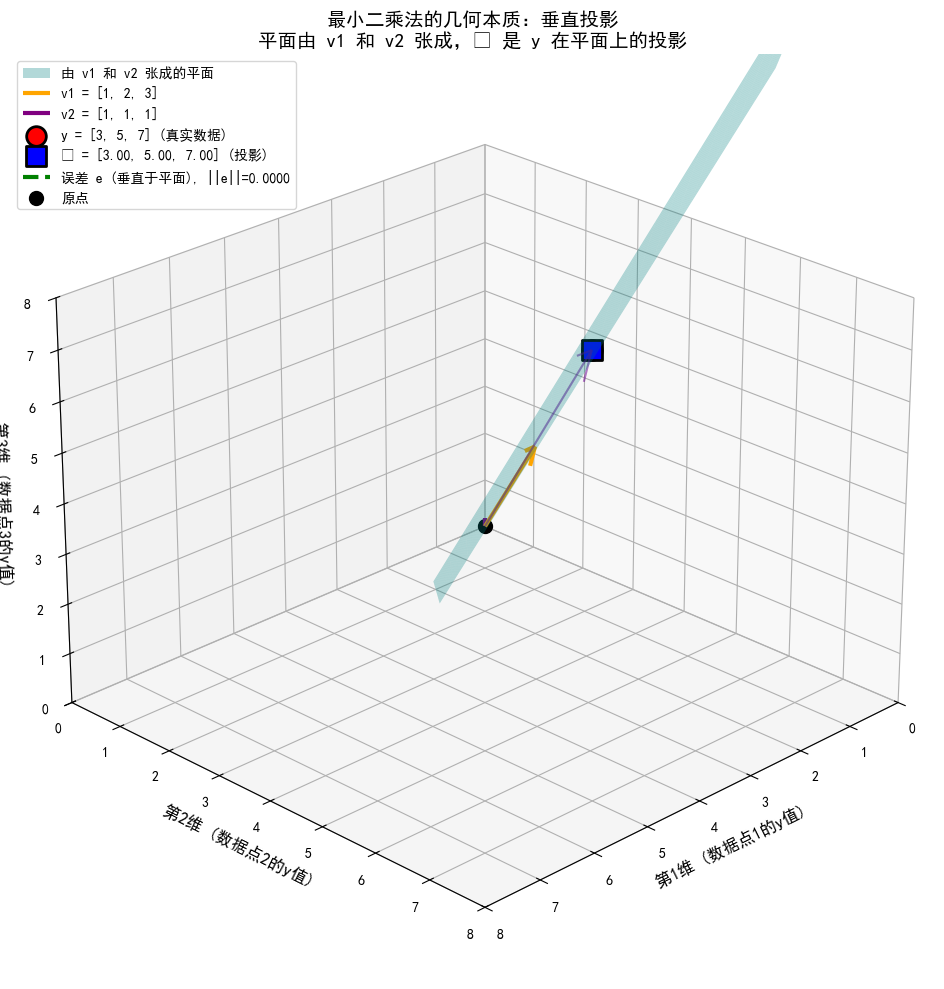


🎯 关键观察：
1. 青色平面由两个橙色(v1)和紫色(v2)向量张成
2. 红色点(y)是真实数据，在平面外
3. 蓝色点(ŷ)是投影点，在平面上
4. 绿色虚线是误差，垂直于平面
5. 这条垂线是从 y 到平面的最短距离！


In [4]:
# 创建 3D 图形
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. 绘制由 v1 和 v2 张成的平面
# 平面上的点 = w*v1 + b*v2，w和b取不同值
w_range = np.linspace(-1, 5, 20)
b_range = np.linspace(-1, 5, 20)
W, B = np.meshgrid(w_range, b_range)

# 计算平面上所有点的坐标
# 每个点 = W*v1 + B*v2
Plane_Y1 = W * v1[0] + B * v2[0]  # 第1维
Plane_Y2 = W * v1[1] + B * v2[1]  # 第2维
Plane_Y3 = W * v1[2] + B * v2[2]  # 第3维

ax.plot_surface(Plane_Y1, Plane_Y2, Plane_Y3, 
                alpha=0.3, color='cyan', edgecolor='none',
                label='由 v1 和 v2 张成的平面')

# 2. 绘制基向量 v1 和 v2（从原点出发）
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], 
          color='orange', arrow_length_ratio=0.15, linewidth=3,
          label=f'v1 = [{v1[0]}, {v1[1]}, {v1[2]}]')

ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], 
          color='purple', arrow_length_ratio=0.15, linewidth=3,
          label=f'v2 = [{v2[0]}, {v2[1]}, {v2[2]}]')

# 3. 绘制目标点 y（真实数据）
ax.scatter([y[0]], [y[1]], [y[2]], 
           color='red', s=200, marker='o', 
           edgecolors='black', linewidths=2,
           label=f'y = [{y[0]}, {y[1]}, {y[2]}] (真实数据)',
           zorder=5)

# 4. 绘制投影点 ŷ（预测值）
ax.scatter([y_pred[0]], [y_pred[1]], [y_pred[2]], 
           color='blue', s=200, marker='s',
           edgecolors='black', linewidths=2,
           label=f'ŷ = [{y_pred[0]:.2f}, {y_pred[1]:.2f}, {y_pred[2]:.2f}] (投影)',
           zorder=5)

# 5. 绘制误差向量（y 到 ŷ）
ax.plot([y[0], y_pred[0]], 
        [y[1], y_pred[1]], 
        [y[2], y_pred[2]], 
        'g--', linewidth=3, 
        label=f'误差 e (垂直于平面), ||e||={np.linalg.norm(error):.4f}',
        zorder=4)

# 6. 绘制从原点到 y 的向量（辅助理解）
ax.quiver(0, 0, 0, y[0], y[1], y[2], 
          color='red', alpha=0.3, arrow_length_ratio=0.1, linewidth=1.5)

# 7. 绘制从原点到 ŷ 的向量（辅助理解）
ax.quiver(0, 0, 0, y_pred[0], y_pred[1], y_pred[2], 
          color='blue', alpha=0.3, arrow_length_ratio=0.1, linewidth=1.5)

# 8. 标注原点
ax.scatter([0], [0], [0], color='black', s=100, marker='o', label='原点')

# 设置标签和标题
ax.set_xlabel('第1维 (数据点1的y值)', fontsize=12)
ax.set_ylabel('第2维 (数据点2的y值)', fontsize=12)
ax.set_zlabel('第3维 (数据点3的y值)', fontsize=12)
ax.set_title('最小二乘法的几何本质：垂直投影\n平面由 v1 和 v2 张成，ŷ 是 y 在平面上的投影', 
             fontsize=14, fontweight='bold')

# 设置合适的视角
ax.view_init(elev=25, azim=45)

# 添加图例
ax.legend(loc='upper left', fontsize=10)

# 设置坐标轴范围
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])

# 添加网格
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 关键观察：")
print("1. 青色平面由两个橙色(v1)和紫色(v2)向量张成")
print("2. 红色点(y)是真实数据，在平面外")
print("3. 蓝色点(ŷ)是投影点，在平面上")
print("4. 绿色虚线是误差，垂直于平面")
print("5. 这条垂线是从 y 到平面的最短距离！")

## 🔬 Part 4: 验证垂直性

数学上，误差 e 必须垂直于 v1 和 v2

In [5]:
# 计算误差向量
e = y - y_pred

# 计算点积（如果垂直，点积应该接近0）
dot_e_v1 = np.dot(e, v1)
dot_e_v2 = np.dot(e, v2)

print("验证垂直性（点积应该接近 0）：")
print(f"e · v1 = {dot_e_v1:.10f}")
print(f"e · v2 = {dot_e_v2:.10f}")

# 计算角度
def angle_between(v1, v2):
    """计算两个向量之间的角度（度）"""
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    # 处理数值误差
    cos_angle = np.clip(cos_angle, -1, 1)
    angle = np.arccos(cos_angle)
    return np.degrees(angle)

angle_e_v1 = angle_between(e, v1)
angle_e_v2 = angle_between(e, v2)

print(f"\ne 与 v1 的夹角: {angle_e_v1:.6f}° (应该接近 90°)")
print(f"e 与 v2 的夹角: {angle_e_v2:.6f}° (应该接近 90°)")

# 验证 X^T e = 0
XTe = X.T @ e
print(f"\nX^T · e = {XTe}")
print("（应该接近 [0, 0]，表示误差垂直于平面）")

if np.allclose(XTe, 0, atol=1e-10):
    print("\n✅ 验证成功！误差确实垂直于平面！")
else:
    print("\n⚠️ 有微小的数值误差，但在可接受范围内")

验证垂直性（点积应该接近 0）：
e · v1 = -0.0000000000
e · v2 = -0.0000000000

e 与 v1 的夹角: 152.250341° (应该接近 90°)
e 与 v2 的夹角: 173.791455° (应该接近 90°)

X^T · e = [-2.22044605e-14 -1.15463195e-14]
（应该接近 [0, 0]，表示误差垂直于平面）

✅ 验证成功！误差确实垂直于平面！


## 📐 Part 5: 对比不同的投影点

展示：为什么垂直投影是最短距离

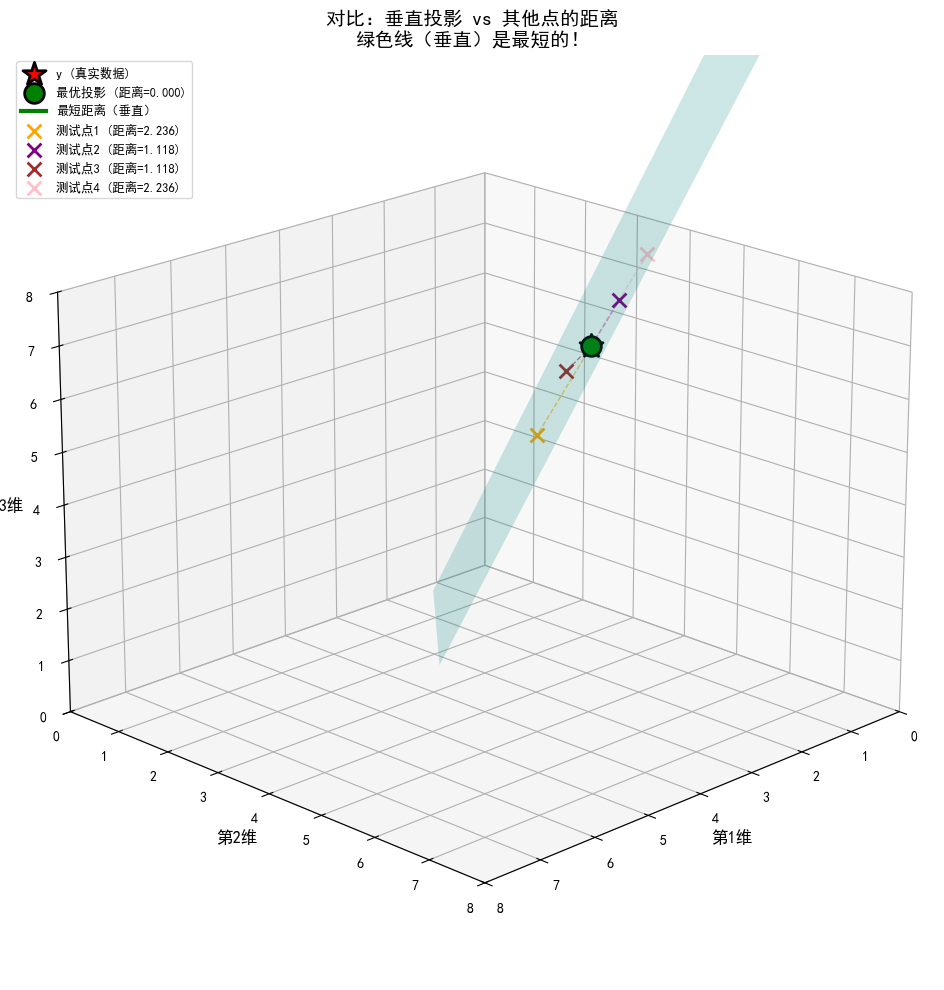


📊 距离对比：
最优投影（垂直）: 0.000000 ← 最短！
测试点1:         2.236068
测试点2:         1.118034
测试点3:         1.118034
测试点4:         2.236068


In [6]:
# 创建多个对比点（平面上的不同位置）
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制平面
ax.plot_surface(Plane_Y1, Plane_Y2, Plane_Y3, 
                alpha=0.2, color='cyan', edgecolor='none')

# 绘制目标点
ax.scatter([y[0]], [y[1]], [y[2]], 
           color='red', s=300, marker='*', 
           edgecolors='black', linewidths=2,
           label='y (真实数据)', zorder=5)

# 绘制最优投影点
ax.scatter([y_pred[0]], [y_pred[1]], [y_pred[2]], 
           color='green', s=200, marker='o',
           edgecolors='black', linewidths=2,
           label=f'最优投影 (距离={np.linalg.norm(error):.3f})', zorder=5)

ax.plot([y[0], y_pred[0]], [y[1], y_pred[1]], [y[2], y_pred[2]], 
        'g-', linewidth=3, label='最短距离（垂直）')

# 测试其他几个点（平面上）
test_params = [
    (1.0, 2.0),
    (2.5, 0.5),
    (1.5, 2.5),
    (3.0, 0.0)
]

colors = ['orange', 'purple', 'brown', 'pink']

for i, (w_test, b_test) in enumerate(test_params):
    # 计算这个参数下的预测点
    y_test = w_test * v1 + b_test * v2
    
    # 计算距离
    dist = np.linalg.norm(y - y_test)
    
    # 绘制测试点
    ax.scatter([y_test[0]], [y_test[1]], [y_test[2]], 
               color=colors[i], s=100, marker='x', linewidths=2,
               label=f'测试点{i+1} (距离={dist:.3f})', zorder=4)
    
    # 绘制连线
    ax.plot([y[0], y_test[0]], [y[1], y_test[1]], [y[2], y_test[2]], 
            color=colors[i], linestyle='--', linewidth=1, alpha=0.6)

ax.set_xlabel('第1维', fontsize=12)
ax.set_ylabel('第2维', fontsize=12)
ax.set_zlabel('第3维', fontsize=12)
ax.set_title('对比：垂直投影 vs 其他点的距离\n绿色线（垂直）是最短的！', 
             fontsize=14, fontweight='bold')

ax.view_init(elev=20, azim=45)
ax.legend(loc='upper left', fontsize=9)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 距离对比：")
print(f"最优投影（垂直）: {np.linalg.norm(error):.6f} ← 最短！")
for i, (w_test, b_test) in enumerate(test_params):
    y_test = w_test * v1 + b_test * v2
    dist = np.linalg.norm(y - y_test)
    print(f"测试点{i+1}:         {dist:.6f}")

## 📈 Part 6: 原始数据空间的拟合

回到我们熟悉的 2D 图：x-y 平面上的拟合直线

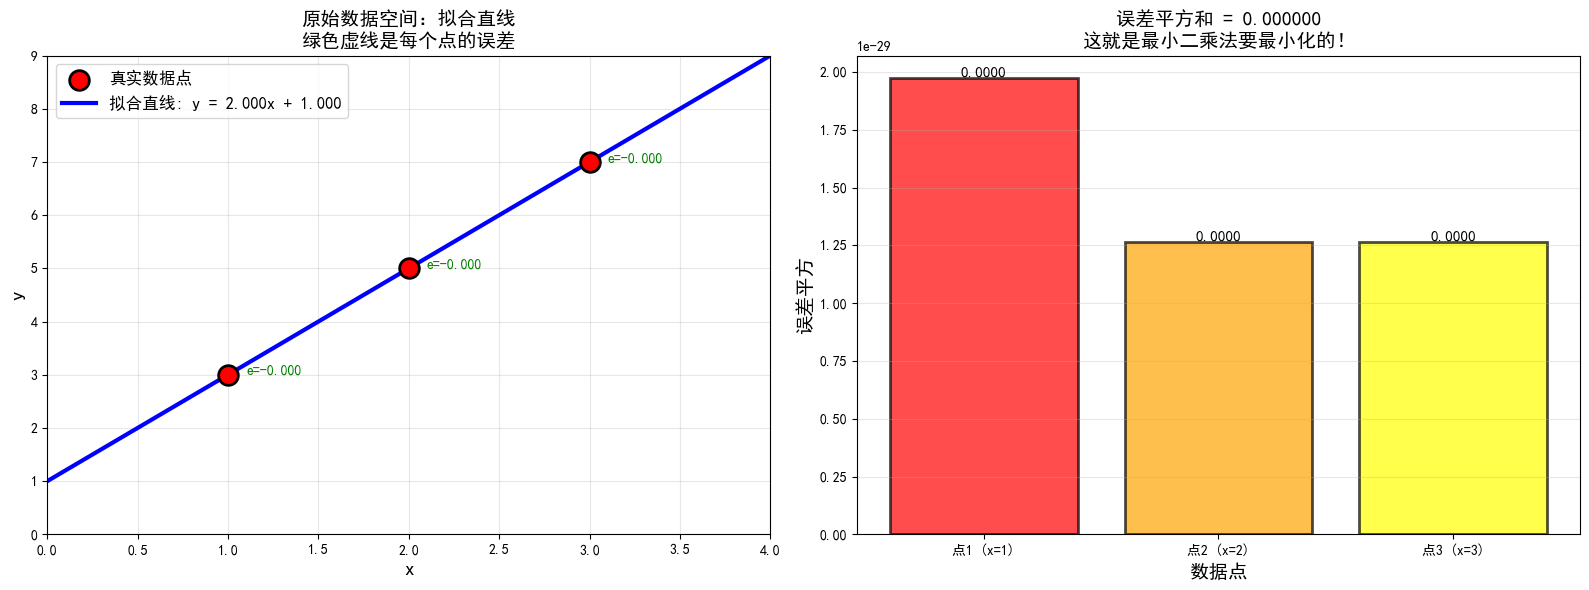


📊 拟合结果总结：
拟合方程: y = 2.0000x + 1.0000
误差平方和: 0.000000
均方误差(MSE): 0.000000
均方根误差(RMSE): 0.000000


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 子图1：拟合直线
x_data = np.array([1, 2, 3])
y_data = y

ax1.scatter(x_data, y_data, color='red', s=200, 
            edgecolors='black', linewidths=2,
            label='真实数据点', zorder=5)

# 绘制拟合直线
x_line = np.linspace(0, 4, 100)
y_line = w * x_line + b
ax1.plot(x_line, y_line, 'b-', linewidth=3, 
         label=f'拟合直线: y = {w:.3f}x + {b:.3f}')

# 绘制误差线（垂直线）
for i in range(len(x_data)):
    ax1.plot([x_data[i], x_data[i]], 
            [y_data[i], y_pred[i]], 
            'g--', linewidth=2, alpha=0.7)
    
    # 标注误差值
    mid_y = (y_data[i] + y_pred[i]) / 2
    ax1.text(x_data[i] + 0.1, mid_y, 
            f'e={error[i]:.3f}', fontsize=10, color='green')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_title('原始数据空间：拟合直线\n绿色虚线是每个点的误差', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 4])
ax1.set_ylim([0, 9])

# 子图2：误差平方和的可视化
errors_squared = error ** 2
x_pos = np.arange(len(x_data))

bars = ax2.bar(x_pos, errors_squared, color=['red', 'orange', 'yellow'],
               edgecolor='black', linewidth=2, alpha=0.7)

# 在柱子上标注数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{errors_squared[i]:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_xlabel('数据点', fontsize=14)
ax2.set_ylabel('误差平方', fontsize=14)
ax2.set_title(f'误差平方和 = {np.sum(errors_squared):.6f}\n这就是最小二乘法要最小化的！', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['点1 (x=1)', '点2 (x=2)', '点3 (x=3)'])
ax2.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 拟合结果总结：")
print(f"拟合方程: y = {w:.4f}x + {b:.4f}")
print(f"误差平方和: {np.sum(errors_squared):.6f}")
print(f"均方误差(MSE): {np.mean(errors_squared):.6f}")
print(f"均方根误差(RMSE): {np.sqrt(np.mean(errors_squared)):.6f}")

## 🎯 Part 7: 交互式探索（可选）

改变参数 w 和 b，观察投影点和误差的变化

尝试不同的参数组合，观察 MSE 的变化：

测试1：w=2.0, b=1.0（接近最优）


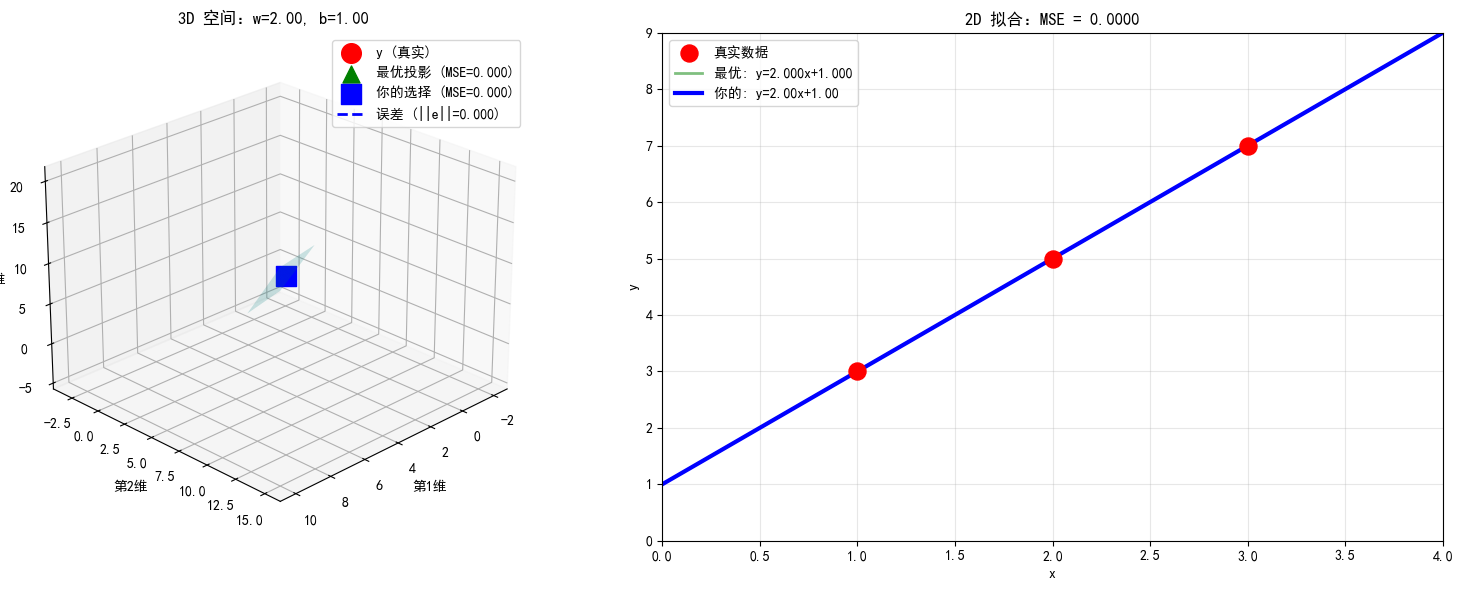


你的参数：w=2.000, b=1.000
最优参数：w=2.000, b=1.000

你的 MSE：0.000000
最优 MSE：0.000000

🎉 太棒了！你找到了最优解！

测试2：w=1.5, b=2.0（偏离最优）


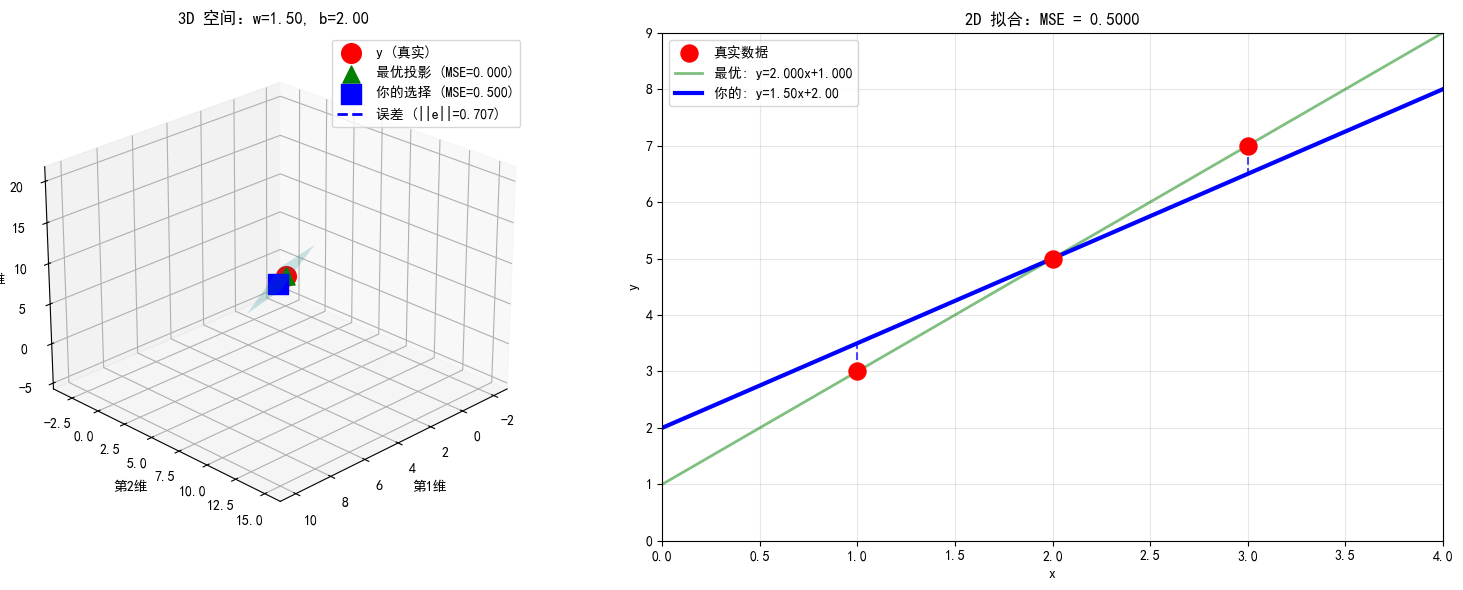


你的参数：w=1.500, b=2.000
最优参数：w=2.000, b=1.000

你的 MSE：0.500000
最优 MSE：0.000000

💡 提示：你的参数不是最优的，MSE 更大


In [8]:
def visualize_projection(w_manual, b_manual):
    """可视化手动选择的参数"""
    
    # 计算手动参数下的预测
    theta_manual = np.array([w_manual, b_manual])
    y_manual = X @ theta_manual
    error_manual = y - y_manual
    mse_manual = np.sum(error_manual ** 2)
    
    # 创建图形
    fig = plt.figure(figsize=(16, 6))
    
    # 子图1：3D 空间
    ax1 = fig.add_subplot(121, projection='3d')
    
    # 绘制平面
    ax1.plot_surface(Plane_Y1, Plane_Y2, Plane_Y3, 
                     alpha=0.2, color='cyan', edgecolor='none')
    
    # 目标点
    ax1.scatter([y[0]], [y[1]], [y[2]], 
               color='red', s=200, marker='o',
               label='y (真实)', zorder=5)
    
    # 最优投影点（对比用）
    ax1.scatter([y_pred[0]], [y_pred[1]], [y_pred[2]], 
               color='green', s=150, marker='^',
               label=f'最优投影 (MSE={np.sum(error**2):.3f})', zorder=5)
    
    # 手动选择的投影点
    ax1.scatter([y_manual[0]], [y_manual[1]], [y_manual[2]], 
               color='blue', s=200, marker='s',
               label=f'你的选择 (MSE={mse_manual:.3f})', zorder=5)
    
    # 误差线
    ax1.plot([y[0], y_manual[0]], [y[1], y_manual[1]], [y[2], y_manual[2]], 
            'b--', linewidth=2, label=f'误差 (||e||={np.linalg.norm(error_manual):.3f})')
    
    ax1.set_xlabel('第1维')
    ax1.set_ylabel('第2维')
    ax1.set_zlabel('第3维')
    ax1.set_title(f'3D 空间：w={w_manual:.2f}, b={b_manual:.2f}')
    ax1.legend()
    ax1.view_init(elev=25, azim=45)
    
    # 子图2：2D 拟合
    ax2 = fig.add_subplot(122)
    
    x_data = np.array([1, 2, 3])
    ax2.scatter(x_data, y, color='red', s=150, label='真实数据', zorder=5)
    
    # 最优拟合线
    x_line = np.linspace(0, 4, 100)
    y_optimal = w * x_line + b
    ax2.plot(x_line, y_optimal, 'g-', linewidth=2, 
            label=f'最优: y={w:.3f}x+{b:.3f}', alpha=0.5)
    
    # 手动拟合线
    y_manual_line = w_manual * x_line + b_manual
    ax2.plot(x_line, y_manual_line, 'b-', linewidth=3, 
            label=f'你的: y={w_manual:.2f}x+{b_manual:.2f}')
    
    # 误差线
    for i in range(len(x_data)):
        ax2.plot([x_data[i], x_data[i]], 
                [y[i], y_manual[i]], 
                'b--', linewidth=1.5, alpha=0.7)
    
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title(f'2D 拟合：MSE = {mse_manual:.4f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim([0, 4])
    ax2.set_ylim([0, 9])
    
    plt.tight_layout()
    plt.show()
    
    # 打印对比
    print(f"\n你的参数：w={w_manual:.3f}, b={b_manual:.3f}")
    print(f"最优参数：w={w:.3f}, b={b:.3f}")
    print(f"\n你的 MSE：{mse_manual:.6f}")
    print(f"最优 MSE：{np.sum(error**2):.6f}")
    
    if mse_manual > np.sum(error**2) + 0.001:
        print("\n💡 提示：你的参数不是最优的，MSE 更大")
    elif abs(mse_manual - np.sum(error**2)) < 0.001:
        print("\n🎉 太棒了！你找到了最优解！")

# 示例：尝试不同的参数
print("尝试不同的参数组合，观察 MSE 的变化：\n")

# 测试1：接近最优解
print("测试1：w=2.0, b=1.0（接近最优）")
visualize_projection(2.0, 1.0)

# 测试2：偏离最优解
print("\n测试2：w=1.5, b=2.0（偏离最优）")
visualize_projection(1.5, 2.0)

## 🧮 Part 8: 数学验证

手动计算，验证公式

In [9]:
print("=
60
,
手动计算验证")
print("=" * 60)

print("\n1. 构建正规方程组")
print("   X^T X θ = X^T y")

print("\n2. 计算 X^T X:")
print(f"   X^T = {X.T}")
print(f"\n   X^T X = {XTX}")

print("\n3. 计算 X^T y:")
print(f"   X^T y = {XTy}")

print("\n4. 求解方程组:")
print(f"   [{XTX[0,0]:2.0f}  {XTX[0,1]:2.0f}] [w]   [{XTy[0]:2.0f}]")
print(f"   [{XTX[1,0]:2.0f}  {XTX[1,1]:2.0f}] [b] = [{XTy[1]:2.0f}]")

print("\n   展开：")
print(f"   {XTX[0,0]}w + {XTX[0,1]}b = {XTy[0]}  ... ①")
print(f"   {XTX[1,0]}w + {XTX[1,1]}b = {XTy[1]}  ... ②")

# 手动求解
# 从方程②: 6w + 3b = 15  =>  2w + b = 5  =>  b = 5 - 2w
# 代入方程①: 14w + 6(5-2w) = 34
#            14w + 30 - 12w = 34
#            2w = 4
#            w = 2
# 则 b = 5 - 2*2 = 1

print("\n   从方程②: 2w + b = 5")
print("            b = 5 - 2w")
print("\n   代入方程①: 14w + 6(5-2w) = 34")
print("              14w + 30 - 12w = 34")
print("              2w = 4")
print("              w = 2")
print("\n   因此 b = 5 - 2×2 = 1")

print("\n5. 最终解:")
print(f"   w = {w:.4f}")
print(f"   b = {b:.4f}")

print("\n6. 验证:")
verification = XTX @ theta
print(f"   X^T X θ = {verification}")
print(f"   X^T y   = {XTy}")
print(f"   相等吗？{np.allclose(verification, XTy)}")

print("\n" + "=" * 60)
print("✅ 验证完成！公式是正确的！")
print("=" * 60)

SyntaxError: unterminated string literal (detected at line 1) (2294219571.py, line 1)

## 🎓 总结：核心要点

### 1️⃣ 几何意义
- **X 的列向量**在 3D 空间张成一个平面
- **y** 是空间中的目标点（真实数据）
- **ŷ = Xθ** 是平面上的投影点（预测值）
- **e = y - ŷ** 是误差向量，**垂直于平面**

### 2️⃣ 为什么垂直？
- 从点到平面的**最短距离**就是**垂线**
- 这是几何定理！

### 3️⃣ 数学推导
```
垂直条件：e ⊥ v1, e ⊥ v2
    ↓
数学表达：X^T e = 0
    ↓
展开：X^T (y - Xθ) = 0
    ↓
正规方程：X^T X θ = X^T y
```

### 4️⃣ 为什么是最小？
- **误差平方和** = ||e||² = 距离的平方
- 最短距离 → 最小平方和
- 这就是"最小二乘法"的名字由来！

### 5️⃣ 关键公式
```python
θ = (X^T X)^(-1) X^T y
```

这不是随便凑的，而是**垂直投影**的数学表达！

## 🎯 动手练习

修改下面的代码，用自己的数据试试！

In [ ]:
# 练习：用你自己的数据
# 修改这里的数据点
my_x = np.array([1, 2, 3, 4])  # x 值
my_y = np.array([2, 4, 5, 8])  # y 值

# 构建 X 矩阵
my_X = np.column_stack([my_x, np.ones(len(my_x))])

# 求解
my_theta = np.linalg.inv(my_X.T @ my_X) @ my_X.T @ my_y
my_w, my_b = my_theta[0], my_theta[1]

# 预测
my_y_pred = my_X @ my_theta

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(my_x, my_y, color='red', s=150, label='真实数据', zorder=5)

x_line = np.linspace(min(my_x)-0.5, max(my_x)+0.5, 100)
y_line = my_w * x_line + my_b
plt.plot(x_line, y_line, 'b-', linewidth=3, 
         label=f'拟合: y = {my_w:.3f}x + {my_b:.3f}')

# 误差线
for i in range(len(my_x)):
    plt.plot([my_x[i], my_x[i]], [my_y[i], my_y_pred[i]], 
            'g--', linewidth=2, alpha=0.7)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('你的数据拟合结果', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

my_error = my_y - my_y_pred
print(f"\n拟合方程: y = {my_w:.4f}x + {my_b:.4f}")
print(f"误差平方和: {np.sum(my_error**2):.6f}")